# OpenCV contours

In this notebook we have a look at contours, moments and matching contours using OpenCV.

## Imports
Includes our own libraries

In [92]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [93]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from lib.imageutil import show_image

## Constructing a binary image

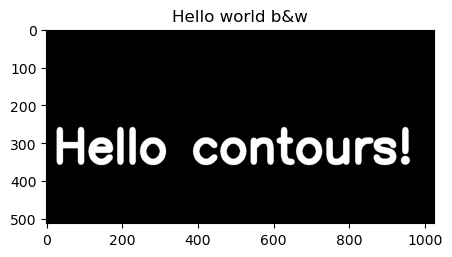

In [94]:
image = np.zeros((512,1024,3), np.uint8)

text = 'Hello contours!'
cv2.putText(image, text, (20,350), cv2.FONT_ITALIC, 4, (255,255,255), 15)

show_image(image, "Hello world b&w", 10)

## Extracting contours
We can use `cv2.findContours(image, Retrieval Mode, Approximation Method)` to find contours in in b&w images.  
If we want to use this method on grayscale, we need to binarise the image first by using `cv2.threshold(...)`.

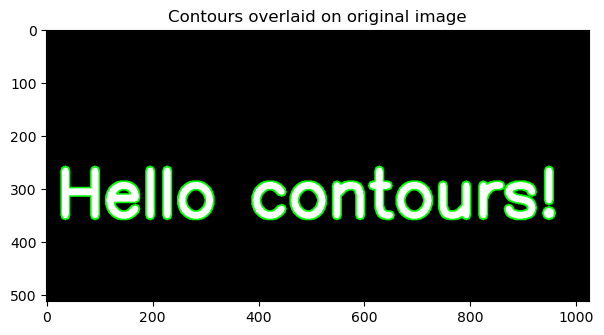

Number of Contours found = 19


In [95]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# finding Contours
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
copy = image.copy()
cv2.drawContours(copy, contours, -1, (0,255,0), thickness = 2)
show_image(copy, 'Contours overlaid on original image', 14)

print("Number of Contours found = " + str(len(contours)))

## Contour area

In [96]:
all_areas = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    all_areas.append(area)


In [97]:
print(sorted(all_areas))

[150.5, 400.0, 1070.0, 1104.0, 1104.0, 1104.0, 1518.0, 1518.0, 1602.0, 2104.5, 2438.0, 2579.5, 2579.5, 2921.0, 3280.0, 3678.0, 3902.0, 3902.0, 3902.0]


In [98]:
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

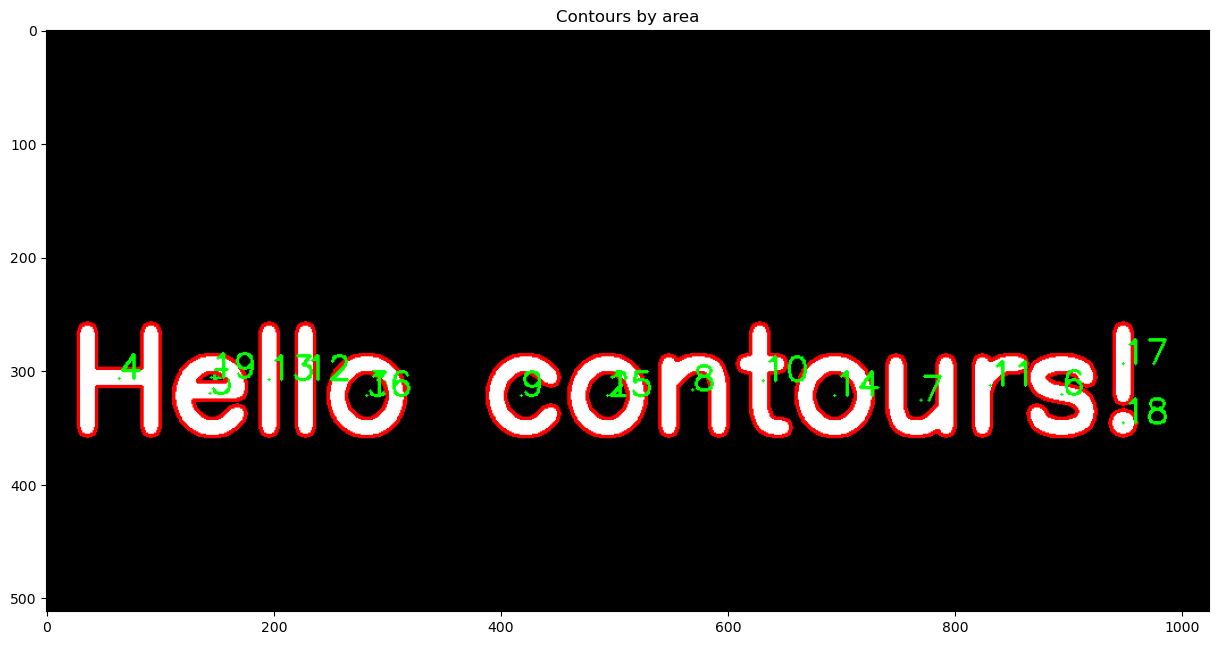

In [99]:
copy = image.copy()

for (i,c) in enumerate(sorted_contours):
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.drawContours(copy, [c], -1, (0,0,255), 2)
    cv2.putText(copy, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.circle(copy, (cx, cy), 1, (0,255,0), -1)

show_image(copy, 'Contours by area', 30)

## Approximating Contours
We can use ApproxPolyDP to approximate contours as polygons with a given precision.  
`cv2.approxPolyDP(contour, Approximation Accuracy, Closed)`

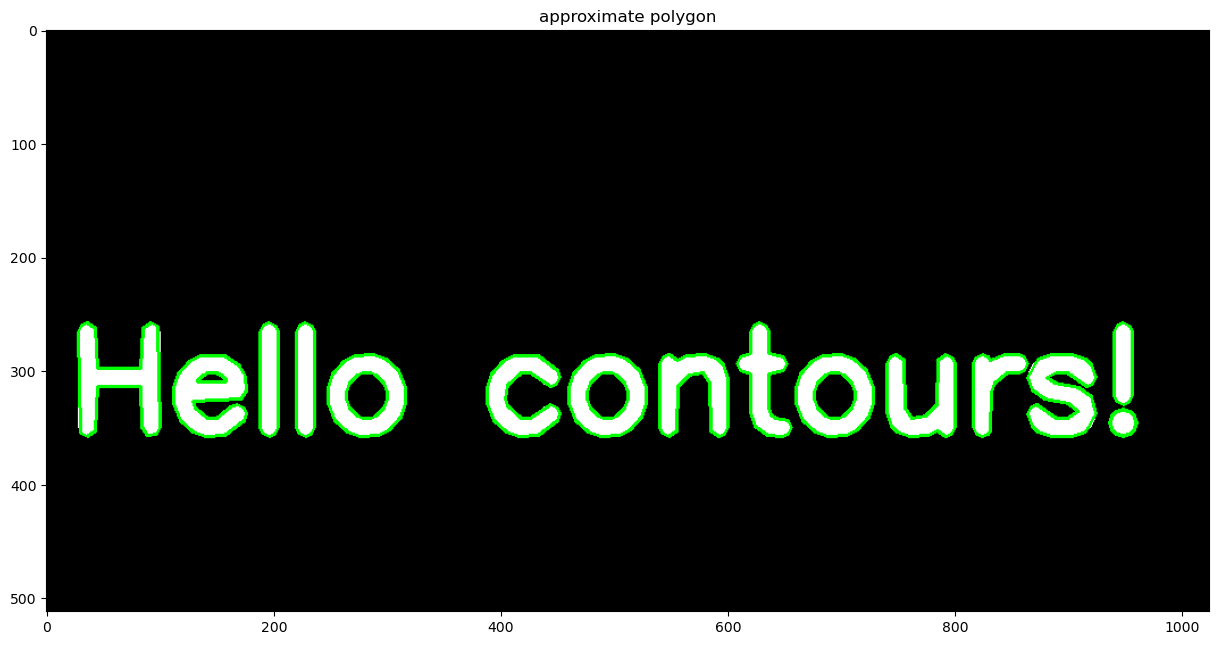

In [100]:
copy = image.copy()

for contour in contours:
    # calculate accuracy as a percentage of the contour length
    accuracy = 0.005 * cv2.arcLength(contour, True)
    approximated = cv2.approxPolyDP(contour, accuracy, True)
    cv2.drawContours(copy, [approximated], 0, (0, 255, 0), 2)

show_image(copy, 'approximate polygon', 30)

## Matching contours
With `cv2.matchShapes(contourTemplate, contour, method, method parameter)` we can try to find a template contour in a given contour.

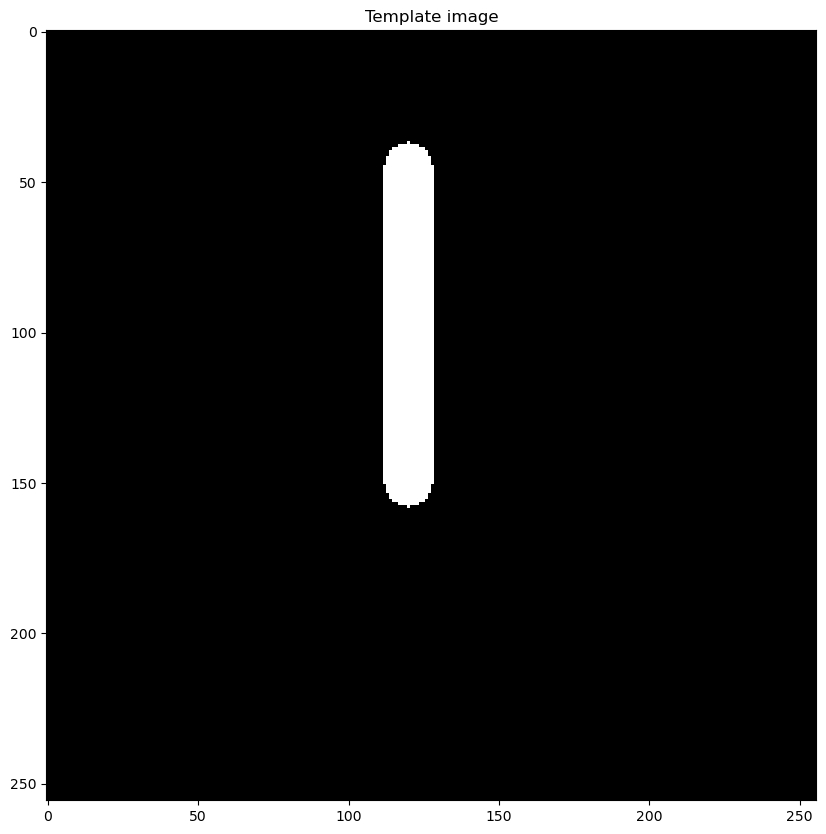

1


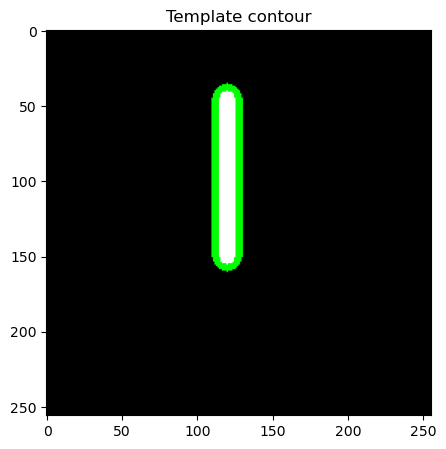

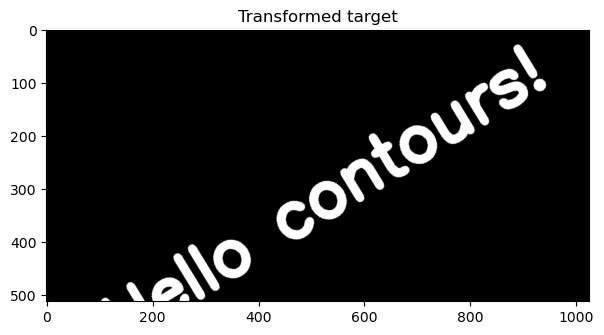

4.599241296384027
5.305577649949351
4.746700855156147
5.236109806026445
4.478033458548725
2.0531530174190795
2.059720960195472
5.482985955096037
5.43715828062393
4.509376401235523
5.481779813334418
5.441169158041876
4.718479127267158
3.487435496150501
5.48470653274304
5.43985136199011
4.720712832400366
4.035940678340015
3.51774837382181
4.979705143740674
3.6573706416869793
smallest_match 2.0531530174190795


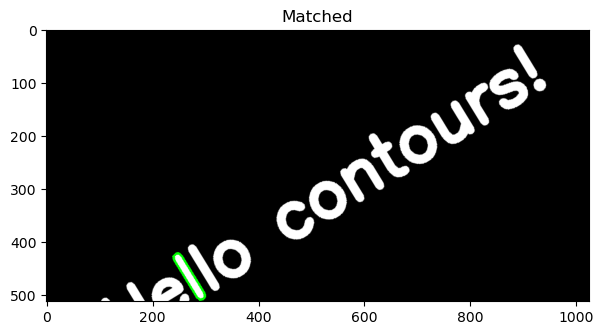

In [108]:
#create a template contour to search for
template_image = np.zeros((256,256,3), np.uint8)

text = 'l'
cv2.putText(template_image, text, (100,150), cv2.FONT_ITALIC, 5, (255,255,255), 15)

show_image(template_image, "Template image", 10)

gray = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
t_contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
print(len(t_contours))

template_image_contour = template_image.copy()
cv2.drawContours(template_image_contour, t_contours, 0, (0,255,0), 3)
show_image(template_image_contour, 'Template contour')

# create warped target image
target = image.copy()
h, w = target.shape[:2]

T = cv2.getRotationMatrix2D((w/2, h/2), 31.5, 1)
target = cv2.warpAffine(target, T, (w, h))
show_image(target, "Transformed target", 14)


# extract contours from targe image
gray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
target_contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# match
smallest_match = float("inf")
closest_contour
for contour in target_contours:
    # Iterate through each contour in the target image and 
    # use cv2.matchShapes to compare contour shapes
    match = cv2.matchShapes(t_contours[0], contour, 1, 0.0)
    print(match)
    # If the match value is less than 0.15 we
    if match < smallest_match:

        smallest_match = match
        closest_contour = contour
        
print(f'smallest_match {smallest_match}')
cv2.drawContours(target, [closest_contour], -1, (0,255,0), 3)
show_image(target, 'Matched',14)
